In [25]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
# import torch
# from torchvision import transforms
from PIL import Image
import numpy as np
import random

dataset_dir = '/opt/disk/lichen/media/nyu1450'
img_dir = os.path.join(dataset_dir, 'rgb')
depth_dir = os.path.join(dataset_dir, 'depth_idx')

imagesName = os.listdir(img_dir)

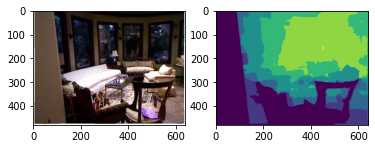

In [37]:
imageName = imagesName[100]
img_path = os.path.join(img_dir, imageName)
depth_path = os.path.join(depth_dir, imageName)

img = Image.open(img_path)
dep = Image.open(depth_path)

img = np.array(img)
dep = np.array(dep)

plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(dep)

In [30]:
all_depths = tf.convert_to_tensor([1 / 2, 1 / 1.5, 1 / 1, 1 / 0.5, 1000], tf.float32)

depth_bins = []
for i in range(5):
    depth_idx = tf.multinomial(tf.log([5 * [1 / 5]]), num_samples=1)
    depth_bins.append(all_depths[tf.cast(depth_idx[0][0], tf.int32)])
patch_size =10
test_depth = np.concatenate(
        [np.ones((patch_size // len(depth_bins), patch_size)) * i for i in range(len(depth_bins))], axis=0)[:, :, None]
test_depth
# disc_depth_map = tf.tile(tf.cast(depth_bins, tf.int16),
#                              multiples=[1, 1, 1, 3])

array([[[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]],

       [[2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.]],

       [[2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.]],

       [[3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.],
        [3.]],

      

In [15]:
sess = tf.Session()
sess.run(depth_bins)

[0.5, 1000.0, 2.0, 1.0, 0.6666667]

In [21]:
disc_depth_map = tf.tile(tf.cast(depth_bins, tf.int16),
                             multiples=[3])

In [20]:
sess = tf.Session()
sess.run(disc_depth_map)

array([   2,    1,    0,    0, 1000,    2,    1,    0,    0, 1000,    2,
          1,    0,    0, 1000], dtype=int16)